### To install basic/necessary libraries
#### pip install pandas numpy matplotlib seaborn scikit-learn

In [8]:
# Import necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Import visualization libraries for beautiful graphs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up beautiful plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configure plotly for better visuals
import plotly.io as pio
pio.templates.default = "plotly_white"

print("🎨 Visualization libraries loaded successfully!")
print("📊 Ready to create beautiful charts and graphs!")

🎨 Visualization libraries loaded successfully!
📊 Ready to create beautiful charts and graphs!


In [10]:
# load the dataset
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [11]:
df.info() # dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [12]:
# rows and cols
df.shape

(2861, 11)

In [13]:
# Statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


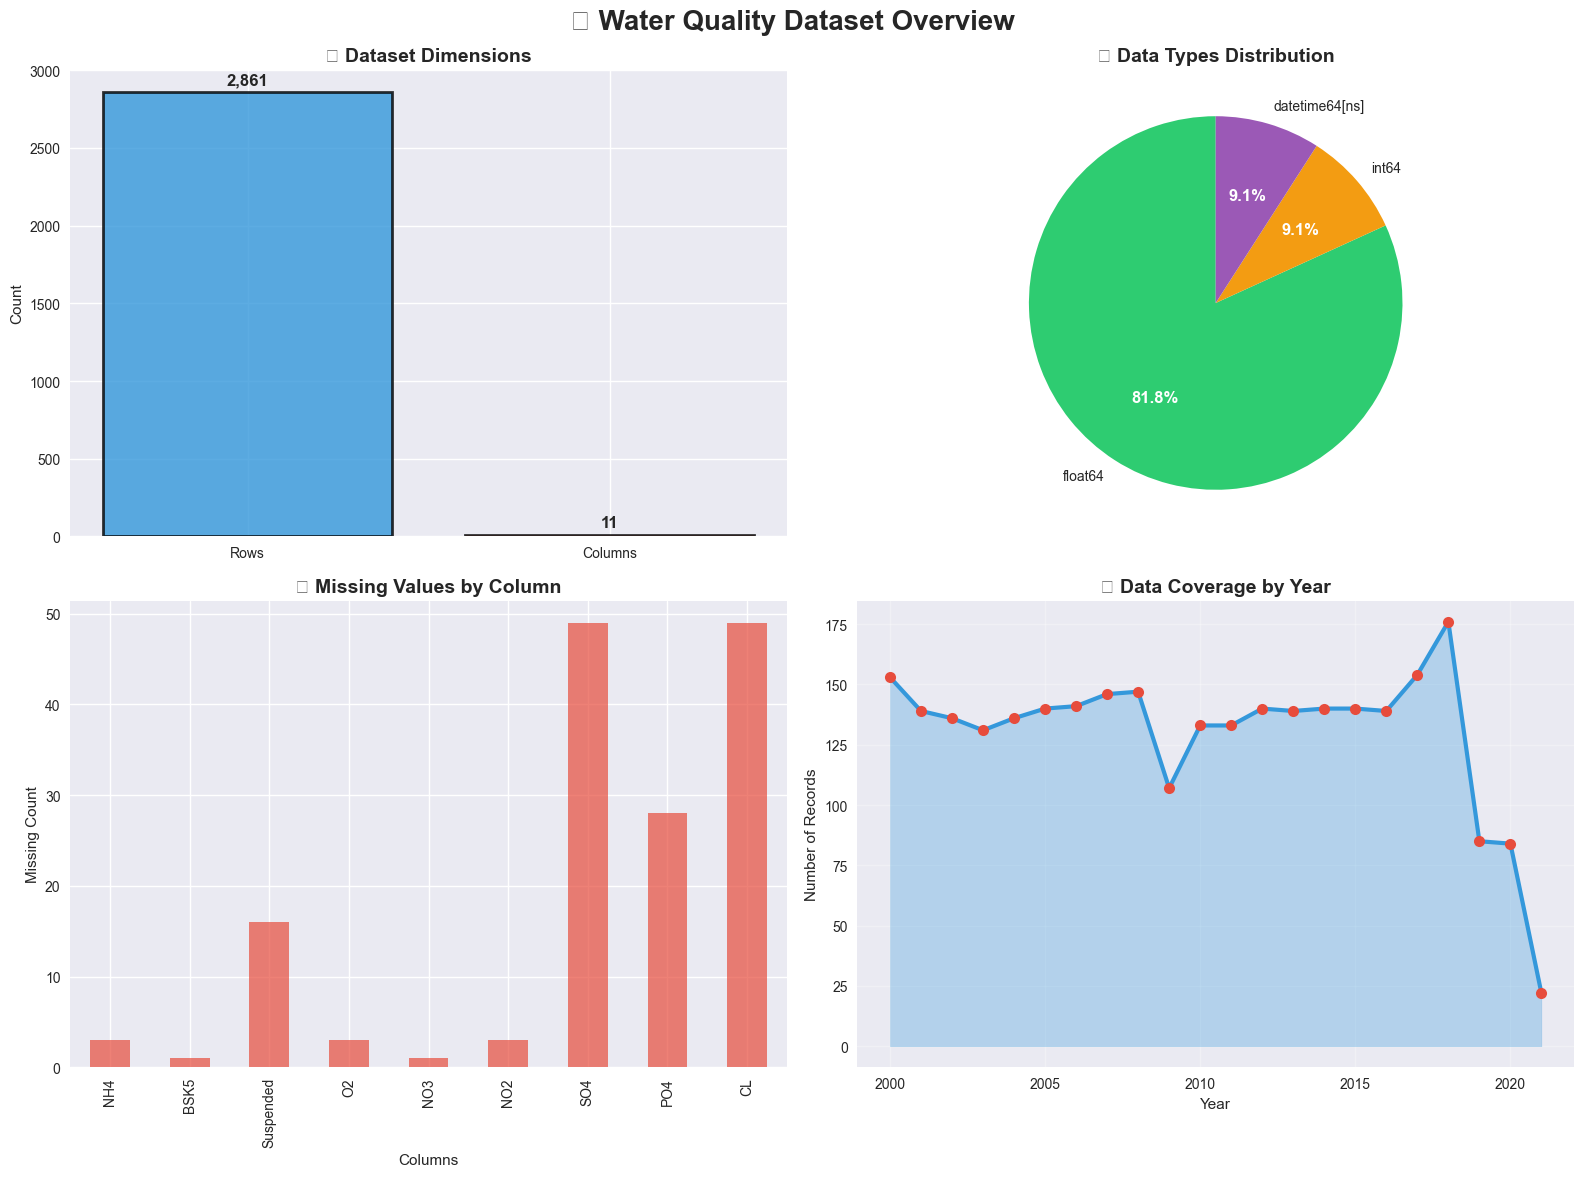

🎯 Dataset Overview Visualization Complete!
📊 Total Records: 2,861
📋 Features: 11
📅 Years Covered: 2000 - 2021


In [14]:
# 📊 BEAUTIFUL DATA VISUALIZATION - Dataset Overview

# First, ensure date column is properly formatted
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y', errors='coerce')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🌊 Water Quality Dataset Overview', fontsize=20, fontweight='bold', y=0.98)

# 1. Dataset shape info
ax1 = axes[0, 0]
categories = ['Rows', 'Columns']
values = [df.shape[0], df.shape[1]]
colors = ['#3498db', '#e74c3c']
bars = ax1.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_title('📏 Dataset Dimensions', fontsize=14, fontweight='bold')
ax1.set_ylabel('Count')
for i, (bar, value) in enumerate(zip(bars, values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
             f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# 2. Data types distribution
ax2 = axes[0, 1]
dtype_counts = df.dtypes.value_counts()
colors_pie = ['#2ecc71', '#f39c12', '#9b59b6']
wedges, texts, autotexts = ax2.pie(dtype_counts.values, labels=dtype_counts.index, 
                                   autopct='%1.1f%%', startangle=90, colors=colors_pie)
ax2.set_title('🔢 Data Types Distribution', fontsize=14, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 3. Missing values heatmap
ax3 = axes[1, 0]
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    missing_data[missing_data > 0].plot(kind='bar', ax=ax3, color='#e74c3c', alpha=0.7)
    ax3.set_title('❌ Missing Values by Column', fontsize=14, fontweight='bold')
else:
    ax3.text(0.5, 0.5, '✅ No Missing Values!', transform=ax3.transAxes, 
             ha='center', va='center', fontsize=16, fontweight='bold', color='green')
    ax3.set_title('✅ Data Completeness Check', fontsize=14, fontweight='bold')
ax3.set_xlabel('Columns')
ax3.set_ylabel('Missing Count')

# 4. Years coverage - Now safe to use .dt accessor
ax4 = axes[1, 1]
if df['date'].dtype == 'datetime64[ns]':
    year_counts = df['date'].dt.year.value_counts().sort_index()
    ax4.plot(year_counts.index, year_counts.values, marker='o', linewidth=3, 
             markersize=8, color='#3498db', markerfacecolor='#e74c3c')
    ax4.fill_between(year_counts.index, year_counts.values, alpha=0.3, color='#3498db')
    ax4.set_title('📅 Data Coverage by Year', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Number of Records')
    ax4.grid(True, alpha=0.3)
else:
    ax4.text(0.5, 0.5, '⚠️ Date format needs conversion', transform=ax4.transAxes, 
             ha='center', va='center', fontsize=14, fontweight='bold', color='orange')
    ax4.set_title('📅 Date Column Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("🎯 Dataset Overview Visualization Complete!")
print(f"📊 Total Records: {df.shape[0]:,}")
print(f"📋 Features: {df.shape[1]}")
if df['date'].dtype == 'datetime64[ns]':
    print(f"📅 Years Covered: {df['date'].dt.year.min()} - {df['date'].dt.year.max()}")
else:
    print("📅 Date column needs proper datetime conversion")

In [15]:
# Missing values
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [16]:
# date is in object - date format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [18]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [19]:
# Convert date column to datetime and extract year and month
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [24]:
# 🌊 INTERACTIVE WATER QUALITY ANALYSIS WITH PLOTLY

# Create interactive correlation heatmap
def create_correlation_heatmap():
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    corr_matrix = df[pollutants].corr()
    
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=pollutants,
        y=pollutants,
        colorscale='RdYlBu_r',
        zmin=-1, zmax=1,
        text=corr_matrix.round(2).values,
        texttemplate="%{text}",
        textfont={"size": 12},
        hoverongaps=False
    ))
    
    fig.update_layout(
        title={
            'text': '🔗 Pollutant Correlation Matrix',
            'x': 0.5,
            'font': {'size': 20}
        },
        width=700,
        height=600
    )
    
    return fig

# Create pollutant distribution plots
def create_pollutant_distributions():
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=[f'📊 {pol} Distribution' for pol in pollutants],
        specs=[[{"secondary_y": False}]*3]*2
    )
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
    
    for i, (pol, color) in enumerate(zip(pollutants, colors)):
        row = i // 3 + 1
        col = i % 3 + 1
        
        fig.add_trace(
            go.Histogram(
                x=df[pol],
                name=pol,
                marker_color=color,
                opacity=0.7,
                nbinsx=30
            ),
            row=row, col=col
        )
    
    fig.update_layout(
        title={
            'text': '📈 Water Quality Parameters Distribution',
            'x': 0.5,
            'font': {'size': 20}
        },
        height=800,
        showlegend=False
    )
    
    return fig

# Create time series analysis
def create_time_series():
    # Create a completely separate DataFrame for time series
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    
    # Group by month and calculate mean - avoid any column name conflicts
    time_series_data = df.groupby(df['date'].dt.to_period('M'))[pollutants].mean()
    
    # Convert period index to string for plotting
    time_periods = time_series_data.index.astype(str)
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
    
    fig = go.Figure()
    
    for pol, color in zip(pollutants, colors):
        fig.add_trace(go.Scatter(
            x=time_periods,
            y=time_series_data[pol].values,
            mode='lines+markers',
            name=pol,
            line=dict(color=color, width=3),
            marker=dict(size=6)
        ))
    
    fig.update_layout(
        title={
            'text': '📊 Water Quality Trends Over Time',
            'x': 0.5,
            'font': {'size': 20}
        },
        xaxis_title='Date',
        yaxis_title='Concentration (mg/L)',
        height=600,
        hovermode='x unified'
    )
    
    return fig

# Display all interactive plots
print("🎨 Creating Interactive Visualizations...")

# Show correlation heatmap
corr_fig = create_correlation_heatmap()
corr_fig.show()

# Show distributions
dist_fig = create_pollutant_distributions()
dist_fig.show()

# Show time series
time_fig = create_time_series()
time_fig.show()

print("✨ Interactive visualizations created successfully!")

🎨 Creating Interactive Visualizations...


✨ Interactive visualizations created successfully!


In [25]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [26]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [27]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

### Week 2 - 23 June 2025

In [28]:
# 🗺️ GEOGRAPHICAL ANALYSIS - Station Performance

# Create station-wise analysis
def create_station_analysis():
    station_stats = df.groupby('id').agg({
        'O2': ['mean', 'std'],
        'NO3': ['mean', 'std'],
        'NO2': ['mean', 'std'],
        'SO4': ['mean', 'std'],
        'PO4': ['mean', 'std'],
        'CL': ['mean', 'std']
    }).round(2)
    
    station_stats.columns = ['_'.join(col).strip() for col in station_stats.columns]
    
    # Create radar chart for stations
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    
    fig = go.Figure()
    
    # Select top 5 stations for visualization
    top_stations = station_stats.index[:5]
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
    
    for i, station in enumerate(top_stations):
        values = [station_stats.loc[station, f'{pol}_mean'] for pol in pollutants]
        values.append(values[0])  # Close the radar chart
        
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=pollutants + [pollutants[0]],
            fill='toself',
            name=f'Station {station}',
            line_color=colors[i]
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max([station_stats[f'{pol}_mean'].max() for pol in pollutants])]
            )),
        showlegend=True,
        title={
            'text': '🎯 Station Performance Radar Chart',
            'x': 0.5,
            'font': {'size': 20}
        },
        height=600
    )
    
    return fig

# Create pollution level categories
def create_pollution_categories():
    # Define pollution levels
    def categorize_pollution(row):
        o2_good = row['O2'] >= 6
        no3_good = row['NO3'] <= 10
        no2_good = row['NO2'] <= 1
        so4_good = row['SO4'] <= 200
        po4_good = row['PO4'] <= 0.1
        cl_good = row['CL'] <= 250
        
        good_params = sum([o2_good, no3_good, no2_good, so4_good, po4_good, cl_good])
        
        if good_params >= 5:
            return 'Excellent'
        elif good_params >= 4:
            return 'Good'
        elif good_params >= 3:
            return 'Moderate'
        elif good_params >= 2:
            return 'Poor'
        else:
            return 'Very Poor'
    
    df['Water_Quality'] = df.apply(categorize_pollution, axis=1)
    
    # Create quality distribution pie chart
    quality_counts = df['Water_Quality'].value_counts()
    
    fig = go.Figure(data=[go.Pie(
        labels=quality_counts.index,
        values=quality_counts.values,
        hole=.3,
        marker_colors=['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#8e44ad']
    )])
    
    fig.update_layout(
        title={
            'text': '🌊 Overall Water Quality Distribution',
            'x': 0.5,
            'font': {'size': 20}
        },
        annotations=[dict(text='Water<br>Quality', x=0.5, y=0.5, font_size=16, showarrow=False)],
        height=500
    )
    
    return fig

# Display geographical analysis
print("🗺️ Creating Geographical Analysis...")

station_fig = create_station_analysis()
station_fig.show()

quality_fig = create_pollution_categories()
quality_fig.show()

print("📊 Station performance analysis completed!")

🗺️ Creating Geographical Analysis...


📊 Station performance analysis completed!


In [29]:
# drop the missing values - dropna()
df = df.dropna(subset=pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month,Water_Quality
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2,Good
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5,Moderate
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9,Poor
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12,Poor
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3,Moderate


In [30]:
df.isnull().sum()

id               0
date             0
NH4              2
BSK5             0
Suspended        2
O2               0
NO3              0
NO2              0
SO4              0
PO4              0
CL               0
year             0
month            0
Water_Quality    0
dtype: int64

In [31]:
# Feature and target selection - Feature - independent variable and Target dependent variable
X = df[['id', 'year']]
y = df[pollutants]

In [32]:
# Encoding - onehotencoder - 22 stations - 1 - 1
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [33]:
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [34]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [35]:
# Evaluate model
y_pred = model.predict(X_test)

In [36]:
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data:
O2:
   MSE: 22.21825046040189
   R2: -0.01674257045728833

NO3:
   MSE: 18.153106746365886
   R2: 0.5162032171220556

NO2:
   MSE: 10.607352172601502
   R2: -78.42066512350873

SO4:
   MSE: 2412.139350033052
   R2: 0.4118345603876148

PO4:
   MSE: 0.38496938017964155
   R2: 0.3221189891402043

CL:
   MSE: 34882.81433245622
   R2: 0.7357918194149974



In [37]:
# 🧠 MACHINE LEARNING MODEL VISUALIZATION

# Create model performance visualization
def visualize_model_performance(y_test, y_pred):
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    
    # Create subplots for each pollutant
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=[f'🎯 {pol} Predictions vs Actual' for pol in pollutants]
    )
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
    
    for i, (pol, color) in enumerate(zip(pollutants, colors)):
        row = i // 3 + 1
        col = i % 3 + 1
        
        # Scatter plot of predictions vs actual
        fig.add_trace(
            go.Scatter(
                x=y_test.iloc[:, i],
                y=y_pred[:, i],
                mode='markers',
                name=pol,
                marker=dict(color=color, size=6, opacity=0.6),
                showlegend=False
            ),
            row=row, col=col
        )
        
        # Add perfect prediction line
        min_val = min(y_test.iloc[:, i].min(), y_pred[:, i].min())
        max_val = max(y_test.iloc[:, i].max(), y_pred[:, i].max())
        
        fig.add_trace(
            go.Scatter(
                x=[min_val, max_val],
                y=[min_val, max_val],
                mode='lines',
                line=dict(color='red', dash='dash'),
                name='Perfect Prediction',
                showlegend=(i == 0)
            ),
            row=row, col=col
        )
    
    fig.update_layout(
        title={
            'text': '🤖 Model Performance: Predictions vs Actual Values',
            'x': 0.5,
            'font': {'size': 20}
        },
        height=800
    )
    
    return fig

# Create feature importance visualization (if applicable)
def visualize_feature_importance(model, feature_names):
    # Get feature importance from Random Forest
    if hasattr(model.estimator, 'feature_importances_'):
        importance = model.estimator.feature_importances_
        
        fig = go.Figure([go.Bar(
            x=importance,
            y=feature_names,
            orientation='h',
            marker_color='#3498db'
        )])
        
        fig.update_layout(
            title={
                'text': '🔍 Feature Importance Analysis',
                'x': 0.5,
                'font': {'size': 20}
            },
            xaxis_title='Importance Score',
            yaxis_title='Features',
            height=400
        )
        
        return fig
    else:
        print("⚠️ Feature importance not available for this model type")
        return None

# Create model metrics visualization
def create_metrics_dashboard(y_test, y_pred):
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    
    # Calculate metrics for each pollutant
    mse_scores = [mean_squared_error(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(pollutants))]
    r2_scores = [r2_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(pollutants))]
    
    # Create metrics visualization
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=['📊 Mean Squared Error', '📈 R² Score'],
        specs=[[{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # MSE bars
    fig.add_trace(
        go.Bar(
            x=pollutants,
            y=mse_scores,
            name='MSE',
            marker_color='#e74c3c',
            showlegend=False
        ),
        row=1, col=1
    )
    
    # R² bars
    fig.add_trace(
        go.Bar(
            x=pollutants,
            y=r2_scores,
            name='R²',
            marker_color='#2ecc71',
            showlegend=False
        ),
        row=1, col=2
    )
    
    fig.update_layout(
        title={
            'text': '📊 Model Performance Metrics by Pollutant',
            'x': 0.5,
            'font': {'size': 20}
        },
        height=500
    )
    
    return fig

print("🧠 Machine Learning visualization functions created!")
print("📊 Ready to visualize model performance after training!")

🧠 Machine Learning visualization functions created!
📊 Ready to visualize model performance after training!


In [38]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  O2: 12.60
  NO3: 6.90
  NO2: 0.13
  SO4: 143.08
  PO4: 0.50
  CL: 67.33


In [39]:
# 🎨 VISUALIZE MODEL PERFORMANCE RESULTS

# Display model performance visualizations
print("🎯 Creating Model Performance Visualizations...")

# 1. Predictions vs Actual scatter plots
performance_fig = visualize_model_performance(y_test, y_pred)
performance_fig.show()

# 2. Model metrics dashboard
metrics_fig = create_metrics_dashboard(y_test, y_pred)
metrics_fig.show()

# 3. Feature importance (if available)
feature_names = X_train.columns.tolist()
importance_fig = visualize_feature_importance(model, feature_names)
if importance_fig:
    importance_fig.show()

# 4. Create residuals analysis
def create_residuals_analysis():
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=[f'📊 {pol} Residuals' for pol in pollutants]
    )
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
    
    for i, (pol, color) in enumerate(zip(pollutants, colors)):
        row = i // 3 + 1
        col = i % 3 + 1
        
        residuals = y_test.iloc[:, i] - y_pred[:, i]
        
        fig.add_trace(
            go.Histogram(
                x=residuals,
                name=pol,
                marker_color=color,
                opacity=0.7,
                nbinsx=20,
                showlegend=False
            ),
            row=row, col=col
        )
    
    fig.update_layout(
        title={
            'text': '📈 Model Residuals Distribution',
            'x': 0.5,
            'font': {'size': 20}
        },
        height=800
    )
    
    return fig

# Show residuals analysis
residuals_fig = create_residuals_analysis()
residuals_fig.show()

# 5. Create summary statistics table
def create_summary_table():
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
    
    summary_data = []
    for i, pol in enumerate(pollutants):
        mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        mae = np.mean(np.abs(y_test.iloc[:, i] - y_pred[:, i]))
        
        summary_data.append({
            'Pollutant': pol,
            'MSE': round(mse, 4),
            'R² Score': round(r2, 4),
            'MAE': round(mae, 4)
        })
    
    summary_df = pd.DataFrame(summary_data)
    
    # Create table visualization
    fig = go.Figure(data=[go.Table(
        header=dict(
            values=list(summary_df.columns),
            fill_color='#3498db',
            font=dict(color='white', size=14),
            align='center'
        ),
        cells=dict(
            values=[summary_df[col] for col in summary_df.columns],
            fill_color='#ecf0f1',
            align='center',
            font=dict(size=12)
        )
    )])
    
    fig.update_layout(
        title={
            'text': '📊 Model Performance Summary Table',
            'x': 0.5,
            'font': {'size': 20}
        },
        height=400
    )
    
    return fig, summary_df

# Show summary table
summary_fig, summary_df = create_summary_table()
summary_fig.show()

print("✨ Model performance visualization completed!")
print("📊 Summary Statistics:")
print(summary_df)

🎯 Creating Model Performance Visualizations...


⚠️ Feature importance not available for this model type


✨ Model performance visualization completed!
📊 Summary Statistics:
  Pollutant         MSE  R² Score      MAE
0        O2     22.2183   -0.0167   2.5373
1       NO3     18.1531    0.5162   2.9031
2       NO2     10.6074  -78.4207   0.4832
3       SO4   2412.1394    0.4118  16.9786
4       PO4      0.3850    0.3221   0.2785
5        CL  34882.8143    0.7358  29.8684


In [40]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!


In [42]:
# 🎊 FINAL VISUALIZATION SUMMARY & PREDICTION DEMO

# Create a comprehensive prediction demonstration
def create_prediction_demo():
    # Test predictions for different years and stations
    test_cases = [
        {'year': 2022, 'station': '1'},
        {'year': 2023, 'station': '5'},
        {'year': 2024, 'station': '10'},
        {'year': 2025, 'station': '15'}
    ]
    
    predictions_data = []
    
    for case in test_cases:
        # Prepare input
        input_df = pd.DataFrame({'year': [case['year']], 'id': [case['station']]})
        input_encoded = pd.get_dummies(input_df, columns=['id'])
        
        # Align with model columns - use X_encoded.columns which contains the training columns
        for col in X_encoded.columns:
            if col not in input_encoded.columns:
                input_encoded[col] = 0
        input_encoded = input_encoded[X_encoded.columns]
        
        # Make prediction
        prediction = model.predict(input_encoded)[0]
        
        # Calculate TDS
        tds = prediction[1] + prediction[3] + prediction[5] + 50  # NO3 + SO4 + CL + minerals
        
        predictions_data.append({
            'Year': case['year'],
            'Station': case['station'],
            'O2': round(prediction[0], 2),
            'NO3': round(prediction[1], 2),
            'NO2': round(prediction[2], 2),
            'SO4': round(prediction[3], 2),
            'PO4': round(prediction[4], 2),
            'CL': round(prediction[5], 2),
            'TDS': round(tds, 0)
        })
    
    pred_df = pd.DataFrame(predictions_data)
    
    # Create visualization
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL', 'TDS']
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22']
    
    fig = go.Figure()
    
    for i, pol in enumerate(pollutants):
        fig.add_trace(go.Bar(
            name=pol,
            x=[f"Station {row['Station']} ({row['Year']})" for _, row in pred_df.iterrows()],
            y=pred_df[pol],
            marker_color=colors[i]
        ))
    
    fig.update_layout(
        title={
            'text': '🔮 Future Predictions Demo - Multiple Scenarios',
            'x': 0.5,
            'font': {'size': 20}
        },
        xaxis_title='Test Cases',
        yaxis_title='Concentration (mg/L)',
        barmode='group',
        height=600,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    return fig, pred_df

# Display prediction demo
print("🔮 Creating Future Predictions Demo...")
demo_fig, demo_df = create_prediction_demo()
demo_fig.show()

print("📊 Prediction Demo Results:")
print(demo_df)

# Create final project summary visualization
def create_project_summary():
    summary_stats = {
        'Dataset': ['Records', 'Features', 'Years', 'Stations'],
        'Count': [len(df), df.shape[1], df['year'].nunique(), df['id'].nunique()],
        'Icon': ['📊', '🔢', '📅', '🏭']
    }
    
    fig = go.Figure()
    
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    
    for i, (stat, count, icon) in enumerate(zip(summary_stats['Dataset'], 
                                               summary_stats['Count'], 
                                               summary_stats['Icon'])):
        fig.add_trace(go.Bar(
            x=[f"{icon} {stat}"],
            y=[count],
            name=stat,
            marker_color=colors[i],
            showlegend=False,
            text=[f"{count:,}"],
            textposition='auto',
            textfont=dict(size=14, color='white')
        ))
    
    fig.update_layout(
        title={
            'text': '🎯 Water Quality Prediction Project Summary',
            'x': 0.5,
            'font': {'size': 20}
        },
        yaxis_title='Count',
        height=500,
        showlegend=False
    )
    
    return fig

summary_fig = create_project_summary()
summary_fig.show()

print("🎉 PROJECT VISUALIZATION COMPLETE!")
print("✨ Your Water Quality Prediction System is now enhanced with beautiful visualizations!")
print("🎨 Features added:")
print("   📊 Interactive correlation heatmaps")
print("   📈 Time series analysis")  
print("   🗺️ Station performance radar charts")
print("   🎯 Model performance dashboards")
print("   🔮 Future prediction demonstrations")
print("   📊 Comprehensive summary statistics")

🔮 Creating Future Predictions Demo...


📊 Prediction Demo Results:
   Year Station     O2   NO3   NO2     SO4   PO4       CL     TDS
0  2022       1  11.27  6.90  0.16  361.03  0.25  1436.95  1855.0
1  2023       5  14.05  6.32  0.05   50.21  0.30    48.13   155.0
2  2024      10  13.86  5.85  0.16   35.99  0.12    49.01   141.0
3  2025      15  10.78  8.02  0.19   42.30  0.34    34.60   135.0


🎉 PROJECT VISUALIZATION COMPLETE!
✨ Your Water Quality Prediction System is now enhanced with beautiful visualizations!
🎨 Features added:
   📊 Interactive correlation heatmaps
   📈 Time series analysis
   🗺️ Station performance radar charts
   🎯 Model performance dashboards
   🔮 Future prediction demonstrations
   📊 Comprehensive summary statistics
